In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def sigmoid(z): return 1 / (1 + np.exp(-z))

def logistic_regression_fit(X, y, learning_rate=0.01, n_iter=1000):
    n_samples, n_features = X.shape
    weights, bias = np.zeros(n_features), 0
    loss_history = []
    
    for _ in range(n_iter):
        linear_model = np.dot(X, weights) + bias
        y_pred = sigmoid(linear_model)
        
        dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
        db = (1/n_samples) * np.sum(y_pred - y)
        
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        loss = (-1/n_samples) * np.sum(y * np.log(y_pred + 1e-15) + (1-y) * np.log(1-y_pred + 1e-15))
        loss_history.append(loss)
        
    return weights, bias, loss_history

def logistic_regression_predict(X, weights, bias, threshold=0.5):
    return (sigmoid(np.dot(X, weights) + bias) >= threshold).astype(int)

In [9]:
X = np.random.randn(1000, 1) * 3 + 2  # mean = 2, sd = 3
true_weights, true_bias = np.array([1.5]), -3
y_prob = 1 / (1 + np.exp(-(X * true_weights + true_bias)))
y = np.random.binomial(1, y_prob.flatten())

weights, bias, loss_history = logistic_regression_fit(X, y, learning_rate=0.1, n_iter=1000)

print(f"Learned weights: {weights[0]:.4f} (True: {true_weights[0]})")
print(f"Learned bias: {bias:.4f} (True: {true_bias})")

Learned weights: 1.5828 (True: 1.5)
Learned bias: -3.0225 (True: -3)


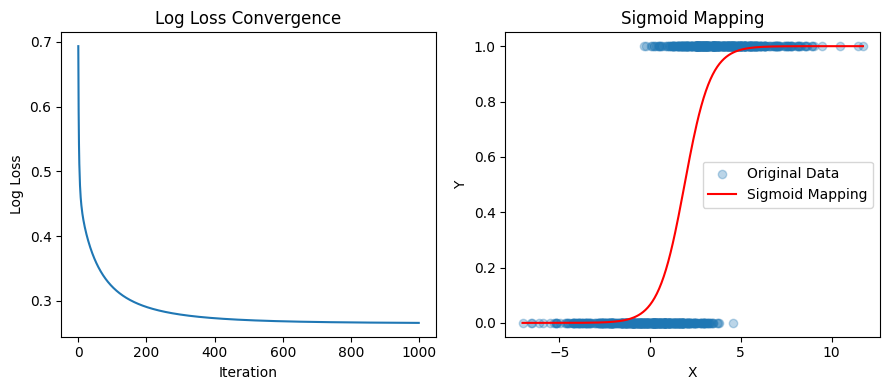

In [8]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.plot(range(len(loss_history)), loss_history)
plt.title("Log Loss Convergence")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")

plt.subplot(1, 2, 2)
x_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_mapped = sigmoid(np.dot(x_test, weights) + bias)
plt.scatter(X, y, alpha=0.3, label='Original Data')
plt.plot(x_test, y_mapped, 'r-', label='Sigmoid Mapping')
plt.title("Sigmoid Mapping")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.tight_layout()
plt.show()